In [ ]:
!pip install opencv-python-headless matplotlib numpy scikit-learn
!pip install torch torchvision
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Create and write to requirements.txt
with open("requirements.txt", "w") as f:
    f.write("""torch
torchvision
Pillow
gdown
numpy
scipy
cmake
onnxruntime-gpu
opencv-python-headless
""")


In [ ]:
!pip install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.0 MB/s eta 0:00:00


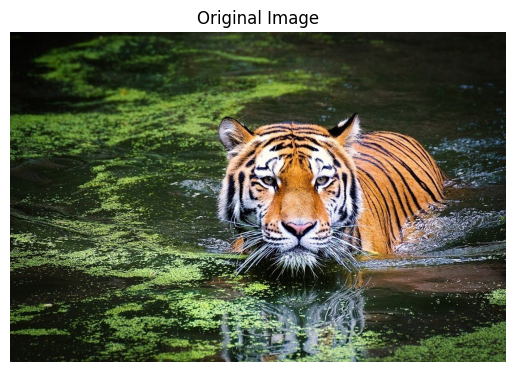

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to image
image_path = '/content/tiger-jpg.jpg'

# Load and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()


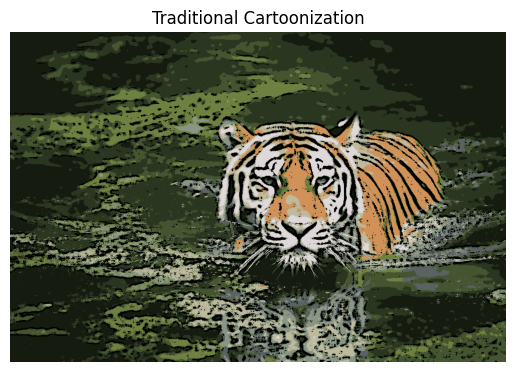

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def read_image(image_path):
    # Check if the image file exists
    if not cv2.haveImageReader(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    img = cv2.imread(image_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, line_size, blur_value)
    return edges

def color_quantization(img, k):
    data = np.float32(img).reshape((-1, 3))
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    return new_colors.reshape(img.shape).astype(np.uint8)

def cartoonize_image(img_path):
    img = read_image(img_path)
    edges = edge_mask(img, 7, 7)
    img = cv2.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)
    quant = color_quantization(img, 9)
    cartoon = cv2.bitwise_and(quant, quant, mask=edges)
    return cartoon

# usage
image_path = "/content/tiger-jpg.jpg"

cartoon = cartoonize_image(image_path)
plt.imshow(cartoon)
plt.axis('off')
plt.title("Traditional Cartoonization")
plt.show()

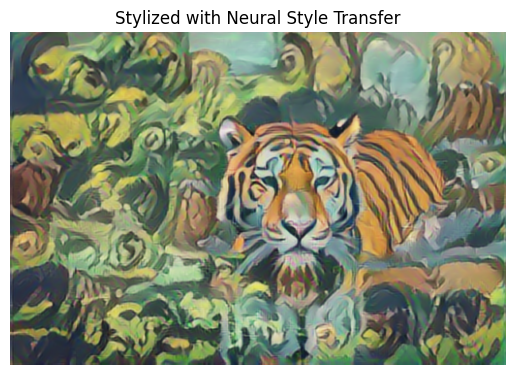

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_img(path_to_img):
    max_dim = 512
    img = Image.open(path_to_img)
    img = img.convert('RGB')
    img.thumbnail((max_dim, max_dim))
    img = np.array(img)
    img = img.astype(np.float32)[np.newaxis, ...] / 255.
    return img

def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    return Image.fromarray(tensor[0])

# Load TF Hub style transfer model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

content_image = load_img("/content/tiger-jpg.jpg")  # Your content photo
style_image = load_img("/cute-tiger-cub-enjoying-nature-cartoon-anime-style-jungle-setting-playful-lounges-rock-amid-lush-greenery-joyfully-352602771.webp")      # Anime/Ghibli style image

# Use keyword arguments
#stylized_image = hub_model(content_image=tf.constant(content_image), style_image=tf.constant(style_image))[0]
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

#stylized_image = style_transfer(content_tensor, style_tensor)

output = tensor_to_image(stylized_image)

plt.imshow(output)
plt.title("Stylized with Neural Style Transfer")
plt.axis("off")
plt.show()


Saving tiger-jpg.jpg to tiger-jpg (1).jpg


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/bryandlee/animegan2-pytorch/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/bryandlee/animegan2-pytorch/raw/main/weights/celeba_distill.pt" to /root/.cache/torch/hub/checkpoints/celeba_distill.pt
100%|██████████| 8.20M/8.20M [00:00<00:00, 44.0MB/s]
Using cache found in /root/.cache/torc

Original Image:


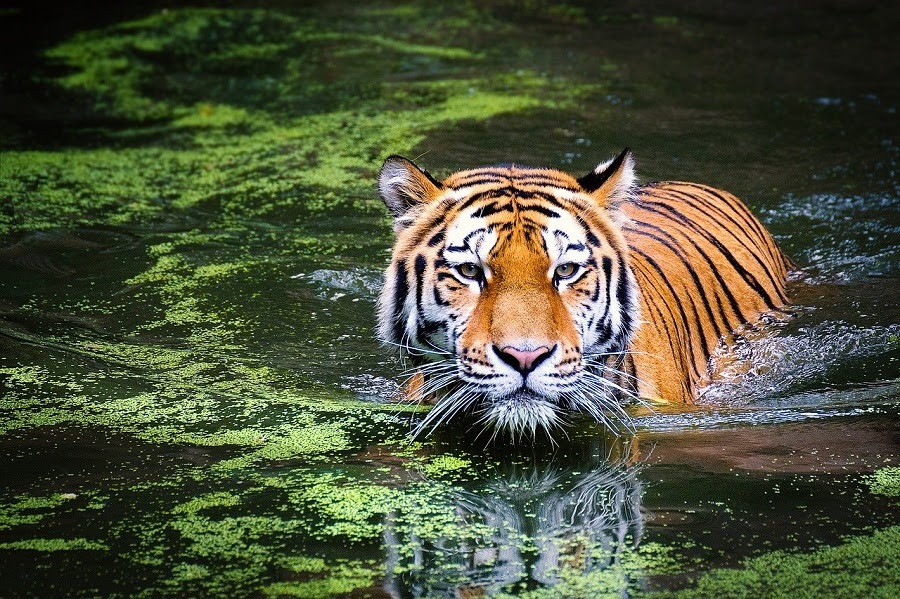

AnimeGAN Output:


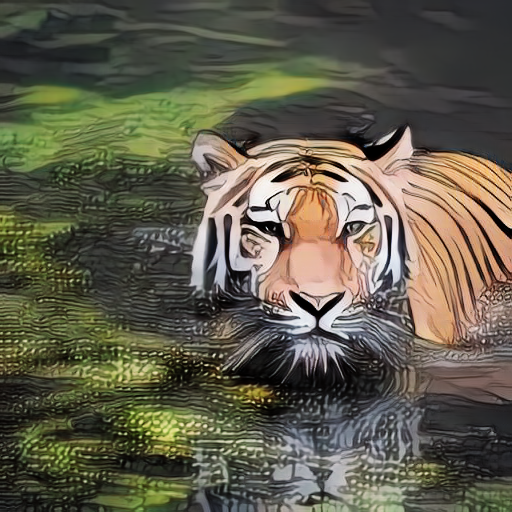

In [ ]:
from google.colab import files
uploaded = files.upload()

import torch
from PIL import Image
import IPython.display as display

# Load pre-trained model and helper function
model = torch.hub.load("bryandlee/animegan2-pytorch", "generator", pretrained="celeba_distill").eval()
face2paint = torch.hub.load("bryandlee/animegan2-pytorch", "face2paint", size=512)

# Loop through uploaded images and stylize
for filename in uploaded.keys():
    img = Image.open(filename).convert("RGB")
    out = face2paint(model, img)

    print("Original Image:")
    display.display(img)
    print("AnimeGAN Output:")
    display.display(out)


# **STEP 1: Upload and Extract Dataset**

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the ZIP file from your PC (select your archive.zip)
uploaded = files.upload()

# Extract the zip file
for filename in uploaded.keys():
    if filename.endswith(".zip"):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("/content/dataset")

# Verify structure
os.listdir("/content/dataset")


Saving archive (1).zip to archive (1) (1).zip


['dataset']

In [ ]:
os.listdir("/content/dataset/dataset")

['trainB_ghibli', 'trainA']

# **STEP 2: Install Dependencies**

In [ ]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

# **STEP 3: Import Libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np


# **STEP 4: Dataset Loader for Paired Images**

In [ ]:
class GhibliDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.real_dir = os.path.join(root_dir, 'dataset/trainA')
        self.ghibli_dir = os.path.join(root_dir, 'dataset/trainB_ghibli')
        self.image_names = sorted(os.listdir(self.real_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        real_path = os.path.join(self.real_dir, self.image_names[idx])
        ghibli_path = os.path.join(self.ghibli_dir, self.image_names[idx])

        real_img = Image.open(real_path).convert('RGB')
        ghibli_img = Image.open(ghibli_path).convert('RGB')

        if self.transform:
            real_img = self.transform(real_img)
            ghibli_img = self.transform(ghibli_img)

        return real_img, ghibli_img


# **STEP 5: Load Dataset**

In [ ]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = GhibliDataset('/content/dataset', transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


# **STEP 6: Define Generator (U-Net Style)**

In [ ]:
class GeneratorUNet(nn.Module):
    def __init__(self):
        super(GeneratorUNet, self).__init__()

        def down_block(in_channels, out_channels, normalize=True):
            layers = [nn.Conv2d(in_channels, out_channels, 4, 2, 1, bias=False)]
            if normalize:
                layers.append(nn.BatchNorm2d(out_channels))
            layers.append(nn.LeakyReLU(0.2))
            return nn.Sequential(*layers)

        def up_block(in_channels, out_channels, dropout=0.0):
            layers = [nn.ConvTranspose2d(in_channels, out_channels, 4, 2, 1, bias=False),
                      nn.BatchNorm2d(out_channels),
                      nn.ReLU()]
            if dropout:
                layers.append(nn.Dropout(dropout))
            return nn.Sequential(*layers)

        self.down1 = down_block(3, 64, normalize=False)
        self.down2 = down_block(64, 128)
        self.down3 = down_block(128, 256)
        self.down4 = down_block(256, 512)
        self.down5 = down_block(512, 512)
        self.down6 = down_block(512, 512)

        self.up1 = up_block(512, 512, dropout=0.5)
        self.up2 = up_block(1024, 256, dropout=0.5)
        self.up3 = up_block(512, 128)
        self.up4 = up_block(256, 64)

        self.final = nn.Sequential(
            nn.ConvTranspose2d(128, 3, 4, 2, 1),
            nn.Tanh()
        )

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)
        d5 = self.down5(d4)
        d6 = self.down6(d5)

        u1 = self.up1(d6)
        u2 = self.up2(torch.cat([u1, d5], dim=1))
        u3 = self.up3(torch.cat([u2, d3], dim=1))
        u4 = self.up4(torch.cat([u3, d1], dim=1))
        return self.final(torch.cat([u4, x], dim=1))


# **STEP 7: Discriminator (PatchGAN)**

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        def layer(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 4, 2, 1),
                nn.BatchNorm2d(out_c),
                nn.LeakyReLU(0.2)
            )

        self.model = nn.Sequential(
            layer(6, 64),
            layer(64, 128),
            layer(128, 256),
            nn.Conv2d(256, 1, 4, 1, 1),  # Patch output
            nn.Sigmoid()
        )

    def forward(self, img_A, img_B):
        x = torch.cat((img_A, img_B), 1)
        return self.model(x)


# **STEP 8: Training Loop**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

G = GeneratorUNet().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
L1 = nn.L1Loss()

optimizer_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

epochs = 20

for epoch in range(epochs):
    for i, (real, ghibli) in enumerate(dataloader):
        real, ghibli = real.to(device), ghibli.to(device)
        batch_size = real.size(0)

        # Train Discriminator
        fake = G(real)
        real_label = torch.ones((batch_size, 1, 30, 30), device=device)
        fake_label = torch.zeros((batch_size, 1, 30, 30), device=device)

        optimizer_D.zero_grad()
        pred_real = D(real, ghibli)
        pred_fake = D(real, fake.detach())
        loss_D = (criterion(pred_real, real_label) + criterion(pred_fake, fake_label)) * 0.5
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        pred_fake = D(real, fake)
        loss_G = criterion(pred_fake, real_label) + 100 * L1(fake, ghibli)
        loss_G.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f}")

    # Show output
    if (epoch+1) % 5 == 0:
        with torch.no_grad():
            fake = G(real)
            images = torch.cat([real, ghibli, fake], dim=0)
            grid = make_grid(images, nrow=batch_size, normalize=True)
            plt.figure(figsize=(15,5))
            plt.imshow(np.transpose(grid.cpu().numpy(), (1,2,0)))
            plt.title(f"Epoch {epoch+1} | Real | Target | Generated")
            plt.axis('off')
            plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset/dataset/trainB_ghibli/world_0372.jpg'

[Epoch 1/10] D_loss: 0.0014, G_loss: 55.6297
[Epoch 2/10] D_loss: 0.0007, G_loss: 47.2338
[Epoch 3/10] D_loss: 0.0005, G_loss: 50.4735
[Epoch 4/10] D_loss: 0.0160, G_loss: 45.2732
[Epoch 5/10] D_loss: 0.0001, G_loss: 52.5600


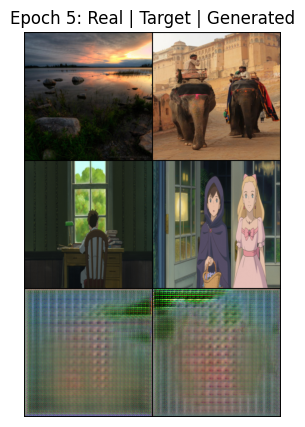

[Epoch 6/10] D_loss: 0.0001, G_loss: 49.0344
[Epoch 7/10] D_loss: 0.0002, G_loss: 52.1405
[Epoch 8/10] D_loss: 0.0000, G_loss: 65.0499
[Epoch 9/10] D_loss: 0.0008, G_loss: 47.0184
[Epoch 10/10] D_loss: 0.0002, G_loss: 55.2326


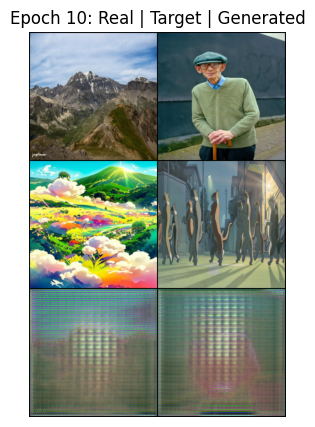

In [ ]:

# Normalize filenames
path_a = '/content/dataset/dataset/trainA'
path_b = '/content/dataset/dataset/trainB_ghibli'

def rename_images_to_consistent_format(folder):
    for idx, filename in enumerate(sorted(os.listdir(folder))):
        new_name = f"img_{idx:04}.jpg"
        os.rename(os.path.join(folder, filename), os.path.join(folder, new_name))

rename_images_to_consistent_format(path_a)
rename_images_to_consistent_format(path_b)

# Dataset
class GhibliDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.real_dir = os.path.join(root_dir, 'dataset/trainA')
        self.ghibli_dir = os.path.join(root_dir, 'dataset/trainB_ghibli')
        self.image_names = sorted(os.listdir(self.real_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        real_path = os.path.join(self.real_dir, self.image_names[idx])
        ghibli_path = os.path.join(self.ghibli_dir, self.image_names[idx])

        real_img = Image.open(real_path).convert('RGB')
        ghibli_img = Image.open(ghibli_path).convert('RGB')

        if self.transform:
            real_img = self.transform(real_img)
            ghibli_img = self.transform(ghibli_img)

        return real_img, ghibli_img

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = GhibliDataset('/content/dataset', transform=transform)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

# Generator
class GeneratorUNet(nn.Module):
    def __init__(self):
        super(GeneratorUNet, self).__init__()

        def down_block(in_c, out_c, normalize=True):
            layers = [nn.Conv2d(in_c, out_c, 4, 2, 1)]
            if normalize:
                layers.append(nn.BatchNorm2d(out_c))
            layers.append(nn.LeakyReLU(0.2))
            return nn.Sequential(*layers)

        def up_block(in_c, out_c, dropout=0.0):
            layers = [nn.ConvTranspose2d(in_c, out_c, 4, 2, 1),
                      nn.BatchNorm2d(out_c),
                      nn.ReLU()]
            if dropout:
                layers.append(nn.Dropout(dropout))
            return nn.Sequential(*layers)

        self.down1 = down_block(3, 64, normalize=False)   # 256 -> 128
        self.down2 = down_block(64, 128)                  # 128 -> 64
        self.down3 = down_block(128, 256)                 # 64 -> 32
        self.down4 = down_block(256, 512)                 # 32 -> 16
        self.down5 = down_block(512, 512)                 # 16 -> 8
        self.down6 = down_block(512, 512)                 # 8 -> 4

        self.up1 = up_block(512, 512, dropout=0.5)        # 4 -> 8
        self.up2 = up_block(1024, 256, dropout=0.5)       # 8 -> 16
        self.up3 = up_block(768, 128)                     # 16 -> 32
        self.up4 = up_block(384, 64)                      # 32 -> 64

        self.final = nn.Sequential(
            nn.ConvTranspose2d(192, 3, 4, 2, 1),          # 64 -> 128
            nn.Tanh(),
            nn.Upsample(scale_factor=2)                   # 128 -> 256
        )

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)
        d5 = self.down5(d4)
        d6 = self.down6(d5)

        u1 = self.up1(d6)
        u1 = torch.cat([u1, d5], dim=1)

        u2 = self.up2(u1)
        u2 = torch.cat([u2, d4], dim=1)

        u3 = self.up3(u2)
        u3 = torch.cat([u3, d3], dim=1)

        u4 = self.up4(u3)
        u4 = torch.cat([u4, d2], dim=1)

        out = self.final(u4)
        return out

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        def block(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 4, 2, 1),
                nn.BatchNorm2d(out_c),
                nn.LeakyReLU(0.2)
            )

        self.model = nn.Sequential(
            block(6, 64),
            block(64, 128),
            block(128, 256),
            nn.Conv2d(256, 1, 4, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, img_A, img_B):
        x = torch.cat((img_A, img_B), dim=1)
        return self.model(x)

# Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = GeneratorUNet().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
L1 = nn.L1Loss()

optimizer_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

epochs = 10

for epoch in range(epochs):
    for real, ghibli in dataloader:
        real, ghibli = real.to(device), ghibli.to(device)
        batch_size = real.size(0)

        # Train Discriminator
        fake = G(real)
        d_real = D(real, ghibli)
        d_fake = D(real, fake.detach())

        real_label = torch.ones_like(d_real, device=device)
        fake_label = torch.zeros_like(d_fake, device=device)

        optimizer_D.zero_grad()
        loss_D = (criterion(d_real, real_label) + criterion(d_fake, fake_label)) * 0.5
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        d_fake = D(real, fake)
        real_label = torch.ones_like(d_fake, device=device)  # reuse for generator
        loss_G = criterion(d_fake, real_label) + 100 * L1(fake, ghibli)
        loss_G.backward()
        optimizer_G.step()


    print(f"[Epoch {epoch+1}/{epochs}] D_loss: {loss_D.item():.4f}, G_loss: {loss_G.item():.4f}")

    if (epoch+1) % 5 == 0:
        with torch.no_grad():
            fake = G(real)
            preview = torch.cat([real, ghibli, fake], dim=0)
            grid = make_grid(preview, nrow=batch_size, normalize=True)
            plt.figure(figsize=(15,5))
            plt.imshow(np.transpose(grid.cpu().numpy(), (1,2,0)))
            plt.title(f"Epoch {epoch+1}: Real | Target | Generated")
            plt.axis('off')
            plt.show()

# Inference on a new image
def cartoonize(image_path, save_path='output.jpg'):
    G.eval()
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = G(image)
        output = (output + 1) / 2
        save_image(output, save_path)
    print(f"Saved cartoon image to: {save_path}")
